# Taller 3 DExp - Punto 6

## Ejercicio 9.6 Montgomery - Diseños $2^k$

+ ### Una bacterióloga...

In [1]:
ejercicio6a<-data.frame(Medio=c(c(rep("M1",12),rep("M2",12))),
                       Tiempo=factor( c( rep( c(rep("12h",6),rep("18h",6)), 2) ) ),
                       replica=factor(rep(c(1,2,3,4,5,6),4)),
                       crec=c(21,23,20,22,28,26,
                              37,38,35,39,38,36,
                              25,24,29,26,25,27,
                              31,29,30,34,33,35))
print(ejercicio6a)

   Medio Tiempo replica crec
1     M1    12h       1   21
2     M1    12h       2   23
3     M1    12h       3   20
4     M1    12h       4   22
5     M1    12h       5   28
6     M1    12h       6   26
7     M1    18h       1   37
8     M1    18h       2   38
9     M1    18h       3   35
10    M1    18h       4   39
11    M1    18h       5   38
12    M1    18h       6   36
13    M2    12h       1   25
14    M2    12h       2   24
15    M2    12h       3   29
16    M2    12h       4   26
17    M2    12h       5   25
18    M2    12h       6   27
19    M2    18h       1   31
20    M2    18h       2   29
21    M2    18h       3   30
22    M2    18h       4   34
23    M2    18h       5   33
24    M2    18h       6   35


In [2]:
anova6a <- aov(crec ~ Medio*Tiempo,data=ejercicio6a)
summary(anova6a)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Medio         1    9.4     9.4   1.835 0.190617    
Tiempo        1  590.0   590.0 115.506 9.29e-10 ***
Medio:Tiempo  1   92.0    92.0  18.018 0.000397 ***
Residuals    20  102.2     5.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [3]:
lm6a <- lm(crec ~ Medio+Tiempo+Medio*Tiempo,data=ejercicio6a)
summary(lm6a)
df_anova=as.data.frame(anova(lm6a))
print(df_anova)


Call:
lm(formula = crec ~ Medio + Tiempo + Medio * Tiempo, data = ejercicio6a)

Residuals:
   Min     1Q Median     3Q    Max 
-3.333 -1.500 -0.250  1.208  4.667 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.3333     0.9227  25.288  < 2e-16 ***
MedioM2             2.6667     1.3049   2.044 0.054393 .  
Tiempo18h          13.8333     1.3049  10.601 1.18e-09 ***
MedioM2:Tiempo18h  -7.8333     1.8454  -4.245 0.000397 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.26 on 20 degrees of freedom
Multiple R-squared:  0.8713,	Adjusted R-squared:  0.852 
F-statistic: 45.12 on 3 and 20 DF,  p-value: 4.346e-09


             Df    Sum Sq    Mean Sq    F value       Pr(>F)
Medio         1   9.37500   9.375000   1.835237 1.906172e-01
Tiempo        1 590.04167 590.041667 115.505710 9.290525e-10
Medio:Tiempo  1  92.04167  92.041667  18.017945 3.969387e-04
Residuals    20 102.16667   5.108333         NA           NA


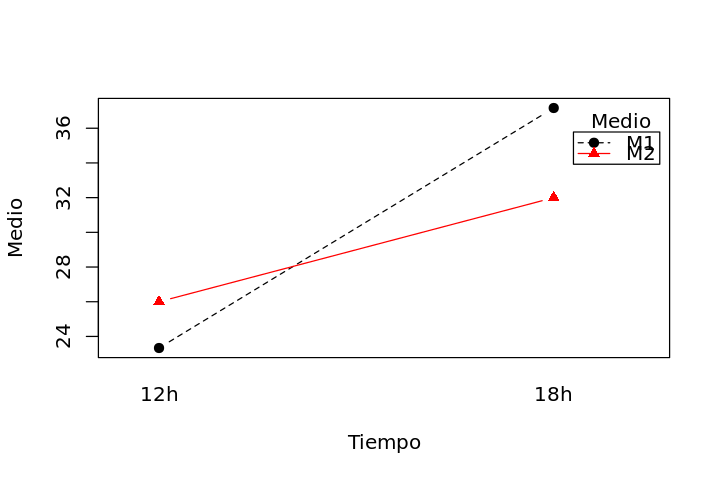

In [4]:
options(warn=-1)
options(repr.plot.width=6, repr.plot.height=4)
library(psych)
attach(ejercicio6a)
interaction.plot(x.factor     = ejercicio6a$Tiempo,
                 trace.factor = Medio, 
                 response     = ejercicio6a$crec, 
                 fun = mean,
                 type="b",
                 col=c("black","red","green"),  ### Colors for levels of trace var.
                 pch=c(19, 17, 15),             ### Symbols for levels of trace var.
                 fixed=TRUE,                    ### Order by factor order in data
                 ylab="Medio", 
                 xlab="Tiempo",
                 leg.bty = "o")

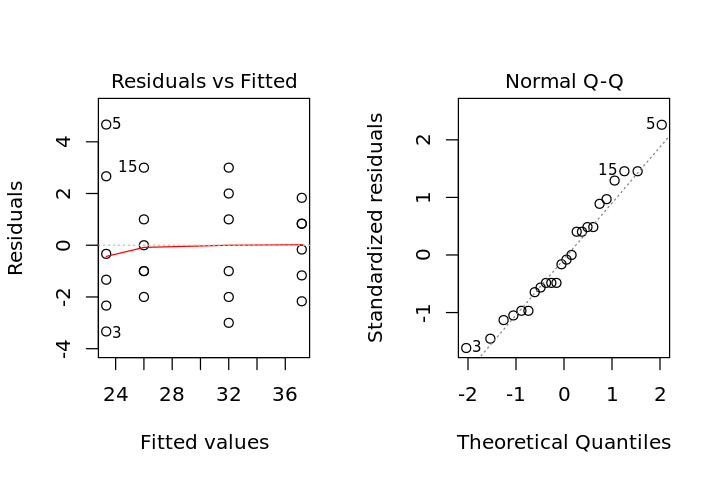

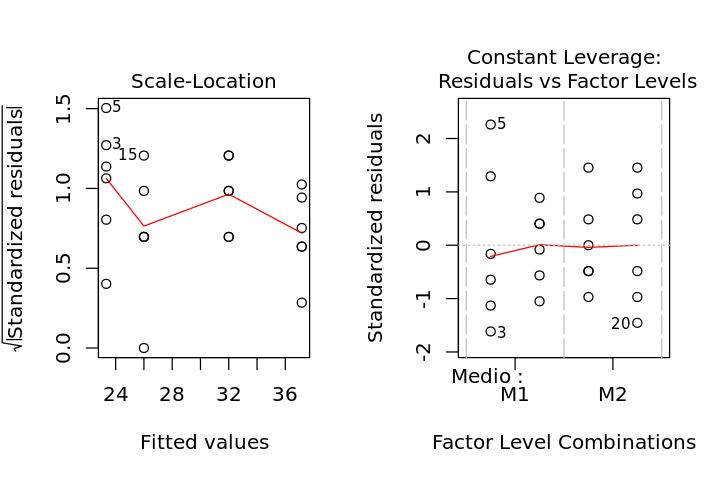

In [5]:
par(mfrow=c(1,2))
# Diagnostic Plots
plot(lm6a)

## Ejercicio 9.14 Montgomery - Diseños $2^k$

+ ### En un esfuerzo por incrementar...

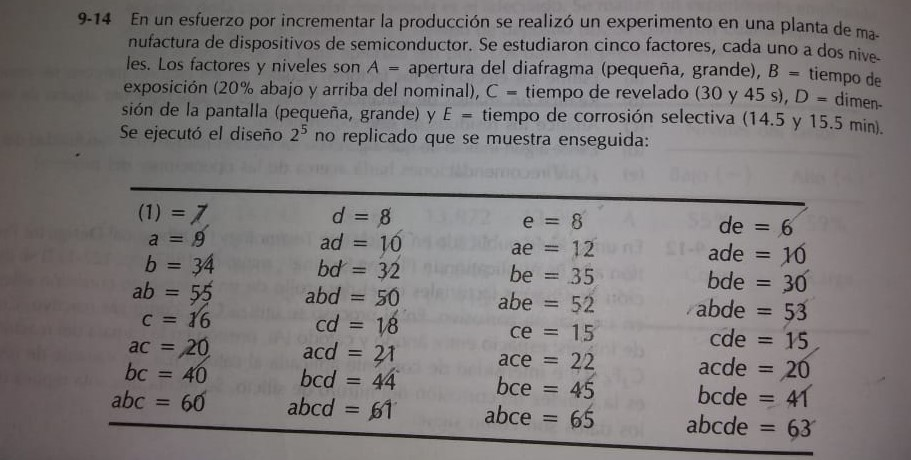

In [6]:
ejercicio6b<-data.frame(E=factor( c( rep("E-",16),rep("E+",16) ) ),
                        D=factor( c( rep( c(rep("D-",8),rep("D+",8)), 2) ) ),
                        C=factor( c( rep( c(rep("C-",4),rep("C+",4)), 4) ) ),
                        B=factor( c( rep( c(rep("B-",2),rep("B+",2)), 8) ) ),
                        A=factor( c( rep( c("A-","A+"), 16) )),
                        crec=c(7,9,34,55,16,20,40,60,
                               8,10,32,50,18,21,44,61,
                               8,12,35,52,15,22,45,65,
                               6,10,30,53,15,20,41,63))
print(ejercicio6b)

    E  D  C  B  A crec
1  E- D- C- B- A-    7
2  E- D- C- B- A+    9
3  E- D- C- B+ A-   34
4  E- D- C- B+ A+   55
5  E- D- C+ B- A-   16
6  E- D- C+ B- A+   20
7  E- D- C+ B+ A-   40
8  E- D- C+ B+ A+   60
9  E- D+ C- B- A-    8
10 E- D+ C- B- A+   10
11 E- D+ C- B+ A-   32
12 E- D+ C- B+ A+   50
13 E- D+ C+ B- A-   18
14 E- D+ C+ B- A+   21
15 E- D+ C+ B+ A-   44
16 E- D+ C+ B+ A+   61
17 E+ D- C- B- A-    8
18 E+ D- C- B- A+   12
19 E+ D- C- B+ A-   35
20 E+ D- C- B+ A+   52
21 E+ D- C+ B- A-   15
22 E+ D- C+ B- A+   22
23 E+ D- C+ B+ A-   45
24 E+ D- C+ B+ A+   65
25 E+ D+ C- B- A-    6
26 E+ D+ C- B- A+   10
27 E+ D+ C- B+ A-   30
28 E+ D+ C- B+ A+   53
29 E+ D+ C+ B- A-   15
30 E+ D+ C+ B- A+   20
31 E+ D+ C+ B+ A-   41
32 E+ D+ C+ B+ A+   63


In [7]:
library(readr)
p914 <- read_delim("p914.csv", ";", escape_double = FALSE, 
    col_names = FALSE, trim_ws = TRUE)

Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double()
)


In [8]:
ef_A=t(c(rep(c(-1,1),16)))%*%ejercicio6b$crec
print(ef_A)

     [,1]
[1,]  189


In [9]:
print(as.data.frame(p914))

      X1  X2
1      A 189
2      B 543
3     AB 127
4      C 155
5     AC   7
6     BC   1
7    ABC  -7
8      D -13
9     AD  -1
10    BD -11
11   ABD   5
12    CD  13
13   ACD  -7
14   BCD   7
15  ABCD  -1
16     E   7
17    AE  15
18    BE   9
19   ABE  -3
20    CE   5
21   ACE   5
22   BCE  15
23  ABCE   3
24    DE -19
25   ADE  13
26   BDE   3
27  ABDE  15
28   CDE -13
29  ACDE  -5
30  BCDE -15
31 ABCDE  -3


In [10]:
df_p914 =data.frame(p914)

integer(0)

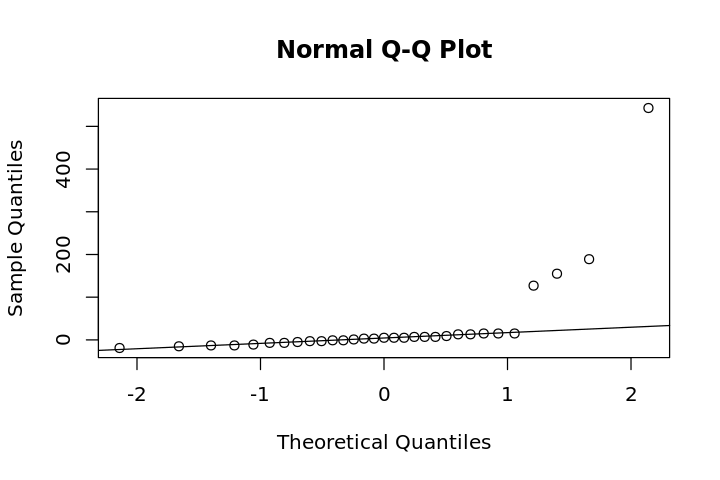

In [11]:
qq=qqnorm(df_p914[,2])
qqline(df_p914[,2])
identify(qq, labels=df_p914[,1],n=4)

In [12]:
lm6b <- lm(crec ~ A+B+A*B+C+A*C+B*C+A*B*C,data=ejercicio6b)
summary(lm6b)
df_anova2=as.data.frame(anova(lm6b))
print(df_anova2)


Call:
lm(formula = crec ~ A + B + A * B + C + A * C + B * C + A * B * 
    C, data = ejercicio6b)

Residuals:
   Min     1Q Median     3Q    Max 
-2.750 -1.062 -0.250  1.250  2.750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.2500     0.8883   8.162 2.21e-08 ***
AA+           3.0000     1.2562   2.388   0.0252 *  
BB+          25.5000     1.2562  20.299  < 2e-16 ***
CC+           8.7500     1.2562   6.965 3.34e-07 ***
AA+:BB+      16.7500     1.7766   9.428 1.53e-09 ***
AA+:CC+       1.7500     1.7766   0.985   0.3344    
BB+:CC+       1.0000     1.7766   0.563   0.5787    
AA+:BB+:CC+  -1.7500     2.5125  -0.697   0.4928    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.777 on 24 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9916 
F-statistic: 524.5 on 7 and 24 DF,  p-value: < 2.2e-16


          Df     Sum Sq    Mean Sq      F value       Pr(>F)
A          1 1116.28125 1116.28125 3.536733e+02 7.204138e-16
B          1 9214.03125 9214.03125 2.919297e+03 1.397907e-26
C          1  750.78125  750.78125 2.378713e+02 5.915541e-14
A:B        1  504.03125  504.03125 1.596931e+02 4.252642e-12
A:C        1    1.53125    1.53125 4.851485e-01 4.927910e-01
B:C        1    0.03125    0.03125 9.900990e-03 9.215648e-01
A:B:C      1    1.53125    1.53125 4.851485e-01 4.927910e-01
Residuals 24   75.75000    3.15625           NA           NA


In [13]:
SC_A= (ef_A)^2/32
print(SC_A)

         [,1]
[1,] 1116.281


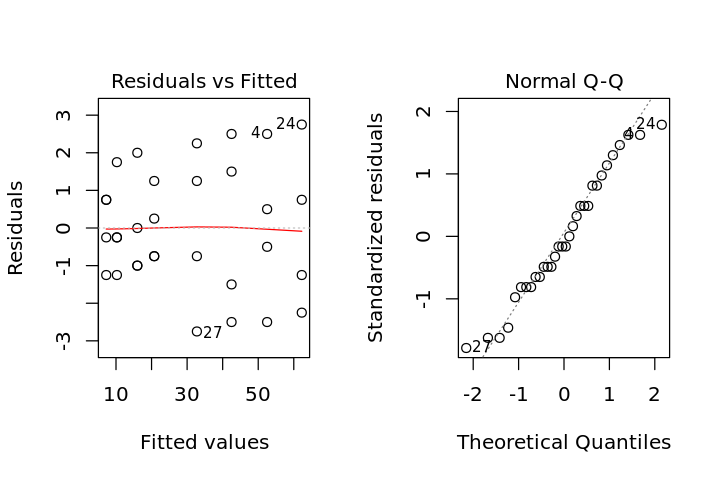

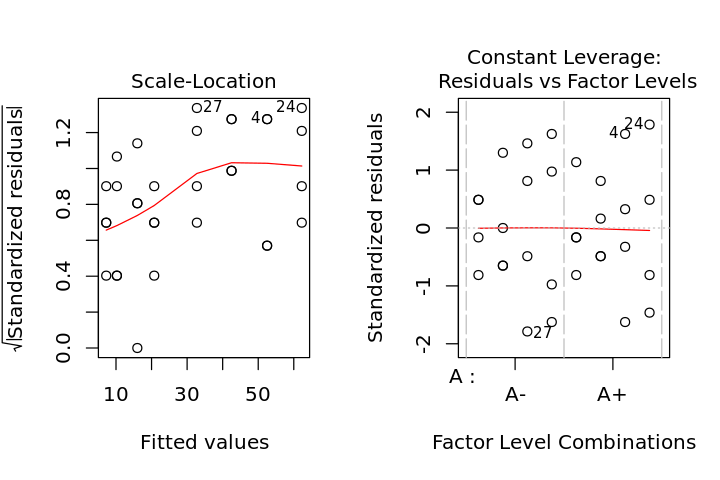

In [14]:
par(mfrow=c(1,2))
# Diagnostic Plots
plot(lm6b)